# Banking Customer Churn
Understanding Customer Behavior and Predicting Churn in Banking Institutions

The data commes from: [Banking Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset) on kaggle.com  


### Data dictionary (Features of each customer)

**RowNumber:** The sequential number assigned to each row in the dataset.

**CustomerId:** A unique identifier for each customer.

***Surname:*** The surname of the customer.

***CreditScore:*** The credit score of the customer.

***Geography:*** The geographical location of the customer (e.g., country or region).

***Gender:*** The gender of the customer.

***Age:*** The age of the customer.

***Tenure:*** The number of years the customer has been with the bank.

***Balance:*** The account balance of the customer.

***NumOfProducts:*** The number of bank products the customer has.

***HasCrCard:*** Indicates whether the customer has a credit card (binary: yes/no).

***IsActiveMember:*** Indicates whether the customer is an active member (binary: yes/no).

***EstimatedSalary:*** The estimated salary of the customer.

***Exited:*** Indicates whether the customer has exited the bank (binary: **yes = 1 / no = 0**).

In [132]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting maximal number of displayed columnes
pd.set_option('display.max_columns', 20)

# read data
df = pd.read_csv("Churn_Modelling.csv")
display(df.head(15))

# Disabling scientific notation for floating-point numbers
# pd.options.display.float_format = '{:,.0f}'.format
# pd.reset_option('display.float_format')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [133]:
#deleting unnecessary column
df = df.drop('RowNumber', axis=1)

In [134]:
#checking datatypes
display(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [135]:
# changing data types
df['CustomerId'] = df['CustomerId'].astype('string')
df['Surname'] = df['Surname'].astype('string')

In [136]:
#df['Geography'] = df['Geography'].map({'Spain':1,'France':2,'Germany':3,})
#df['Geography'] = pd.to_numeric(df['Geography'], downcast='integer')
#df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
#df['Gender'] = pd.to_numeric(df['Gender'], downcast='integer')

In [137]:
# List of columns to be converted to 'category' type
category_columns = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'Exited']

# Convert each of above columns to 'category' type
for column in category_columns:
    df[column] = df[column].astype('category')

In [138]:
#checking datatypes after changes
display(df.dtypes)

CustomerId         string[python]
Surname            string[python]
CreditScore                 int64
Geography                category
Gender                   category
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                category
IsActiveMember           category
EstimatedSalary           float64
Exited                   category
dtype: object

,Retainers,Churners
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


,Retainers,Churners
Geography,,
France,83.85%,16.15%
Germany,67.56%,32.44%
Spain,83.33%,16.67%


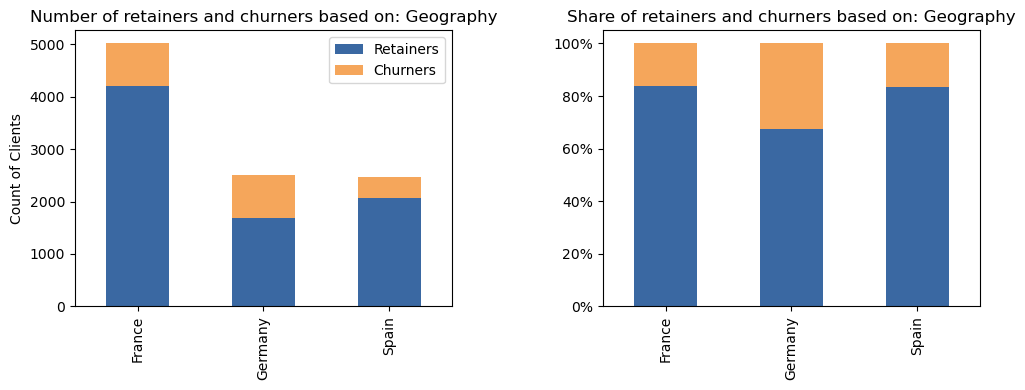

,Retainers,Churners
Gender,,
Female,3404,1139
Male,4559,898


,Retainers,Churners
Gender,,
Female,74.93%,25.07%
Male,83.54%,16.46%


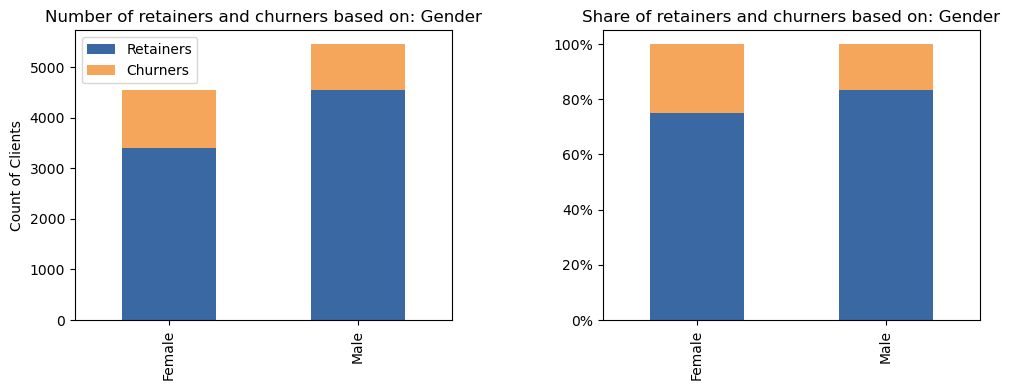

,Retainers,Churners
HasCrCard,,
0,2332,613
1,5631,1424


,Retainers,Churners
HasCrCard,,
0,79.19%,20.81%
1,79.82%,20.18%


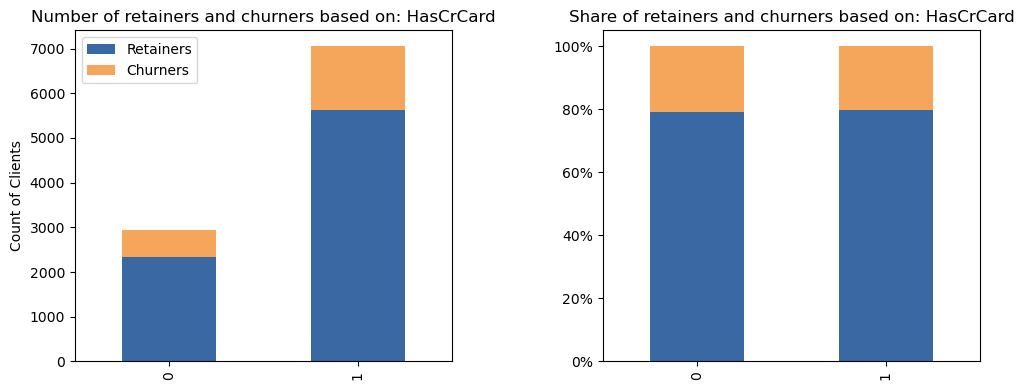

,Retainers,Churners
IsActiveMember,,
0,3547,1302
1,4416,735


,Retainers,Churners
IsActiveMember,,
0,73.15%,26.85%
1,85.73%,14.27%


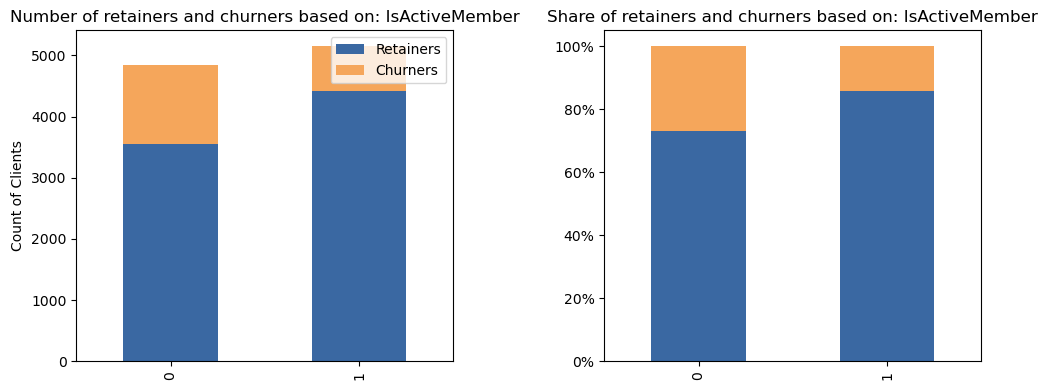

,Retainers,Churners
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


,Retainers,Churners
NumOfProducts,,
1,72.29%,27.71%
2,92.42%,7.58%
3,17.29%,82.71%
4,0.00%,100.00%


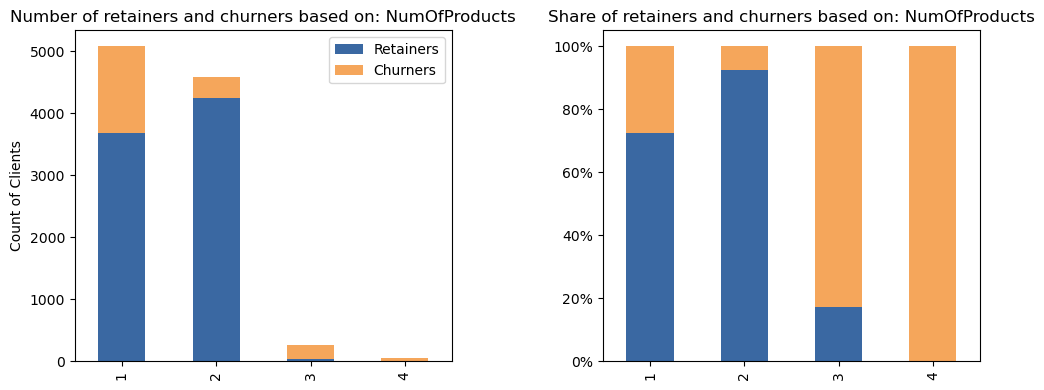

In [139]:
# Analyzing customer churn based on categorical features and NumOfProducts


from matplotlib.ticker import PercentFormatter

selected_features = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'NumOfProducts']

for feature in selected_features:
    #df[feature] = df[feature].astype('category')


    # creating crosstab
    Category_crosstab = pd.crosstab(df[feature], df['Exited'])
    Category_crosstab.columns = ['Retainers', 'Churners']
    display(Category_crosstab)

    # Creating crosstab with normalization
    Category_crosstab_norm = pd.crosstab(df[feature], df['Exited'], normalize='index')
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: f'{x:.2%}') # float into str
    Category_crosstab_norm.columns = ['Retainers', 'Churners']
    display(Category_crosstab_norm)


    # Creating the figure and two axes
    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    # Subplot 1- clients count
    Category_crosstab.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=True,
        ax=axes[0]  # Setting on the first plot
    )
    axes[0].set_title('Number of retainers and churners based on: {}'.format(feature))
    axes[0].set_xlabel(None)
    axes[0].set_ylabel('Count of Clients')

    # Subplot 2- clients share
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: float(x.strip('%')) / 100) # str into float
    Category_crosstab_norm.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=False,
        ax=axes[1]  # Setting on the secound plot
    )
    axes[1].set_title('Share of retainers and churners based on: {}'.format(feature))
    axes[1].set_xlabel(None)
    #axes[1].set_ylabel('Share of Clients [%]')
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4) 
    plt.show()

In [140]:
# read statistics
display(df.describe().round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [141]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [142]:
#checking duplicates

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 0


In [143]:
# checking unique values per column
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


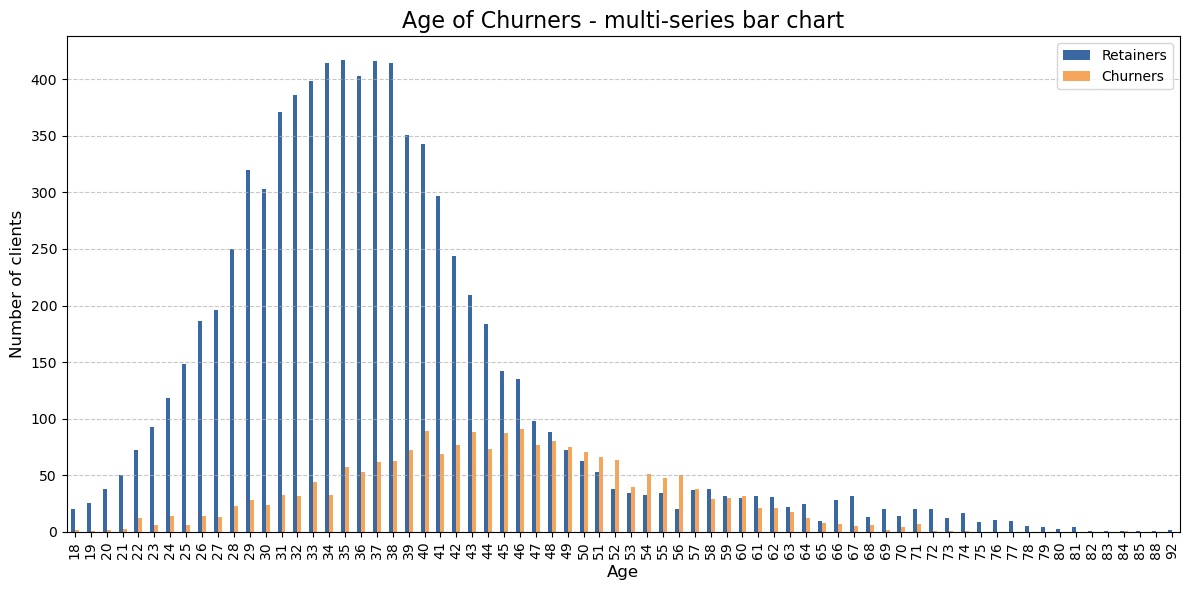

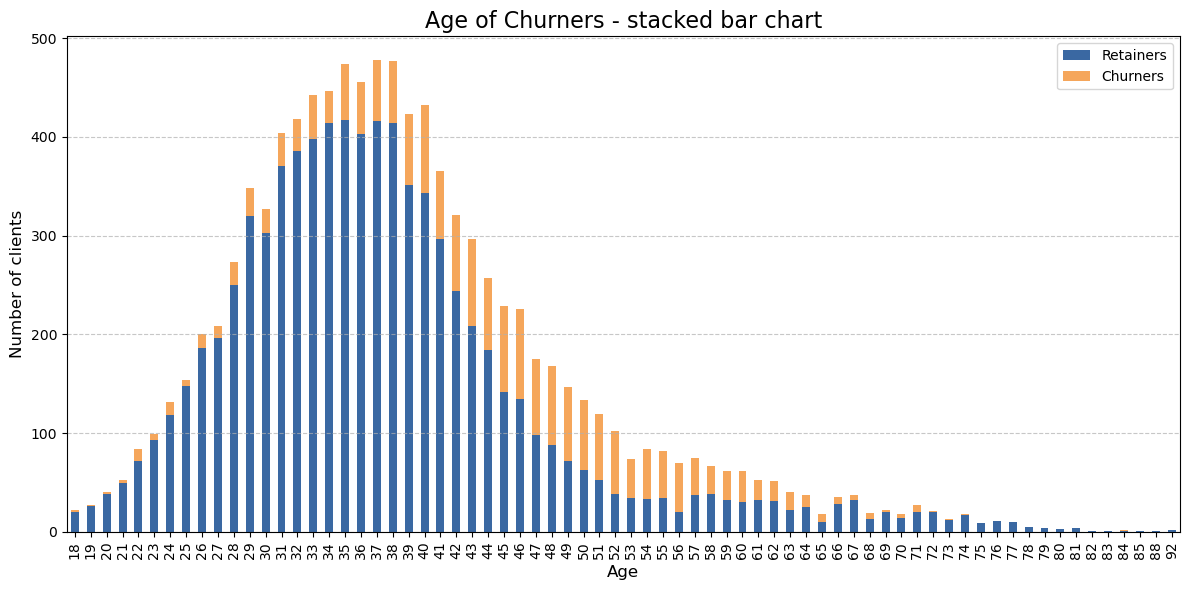

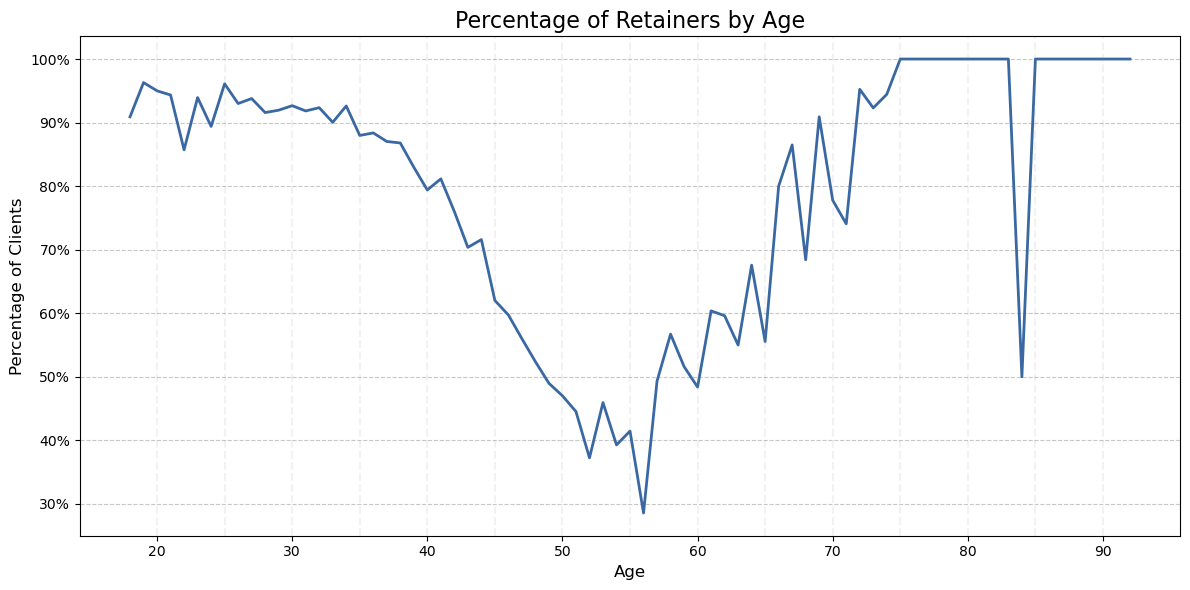

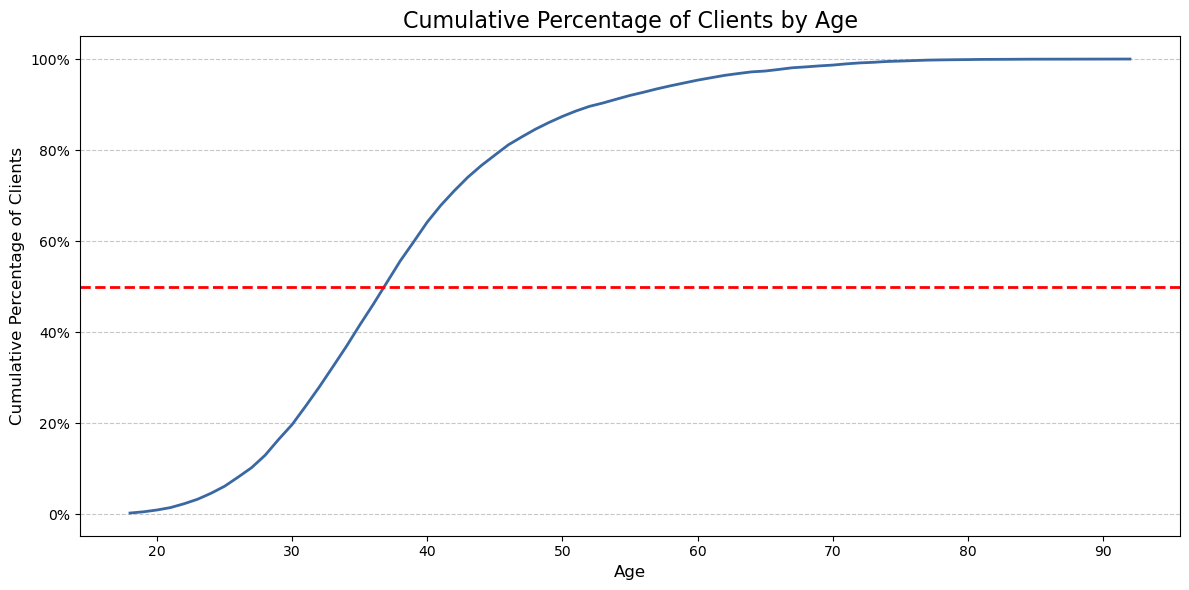

In [144]:
# Selective analysis of features: Age

# Grouping data
grouped = df.groupby(['Age', 'Exited'], observed=True).size().unstack(fill_value=0)

# Creating plot 1
grouped.plot(
    kind='bar', 
    stacked=False, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - multi-series bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Creating plot 2
grouped.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - stacked bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Creating plot 3

# Normalize the data to show percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Creating line plot for percentage of Retainers
ax = grouped_percentage[0].plot(
    kind='line',  # Line plot for Retainers (Exited=0)
    figsize=(12, 6), 
    color='#3a68a2', 
    linewidth=2
)

# Adding title and labels
plt.title('Percentage of Retainers by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Clients', fontsize=12)

# Formatting the y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Adding dashed vertical lines at every 5 units on the x-axis
for i in range(20, max(grouped_percentage.index), 5):
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.1)
# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()


# Creating Plot 4

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Grouping data by age
age_grouped = df.groupby('Age').size()

# Normalize the data to get percentages
age_percentage = age_grouped / age_grouped.sum() * 100

# Calculate cumulative percentage
cumulative_percentage = age_percentage.cumsum()

# Creating the cumulative percentage plot
plt.figure(figsize=(12, 6))
cumulative_percentage.plot(kind='line', color='#3a68a2', linewidth=2)

# Adding title and labels
plt.title('Cumulative Percentage of Clients by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cumulative Percentage of Clients', fontsize=12)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a horizontal dashed line at 50%
plt.axhline(y=50, color='red', linestyle='--', linewidth=2)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()




In [145]:
# Calculating the boundary age for the youngest 50% of clients
boundary_age = df['Age'].quantile(0.5)

# Displaying the boundary age
print(f'Boundary age for the youngest 50% of clients: {boundary_age}')

Boundary age for the youngest 50% of clients: 37.0


### Conclusions
- Boundary age for the youngest 50% of clients: 37
- After the age of 37, the share of retainers declines significantly
- Customers of age between 49 and 57 are mostly churners
- Groups of customers older than 60 are mostly retainers, however, their numbers are not large.

### Analysing distribution of the numerical features

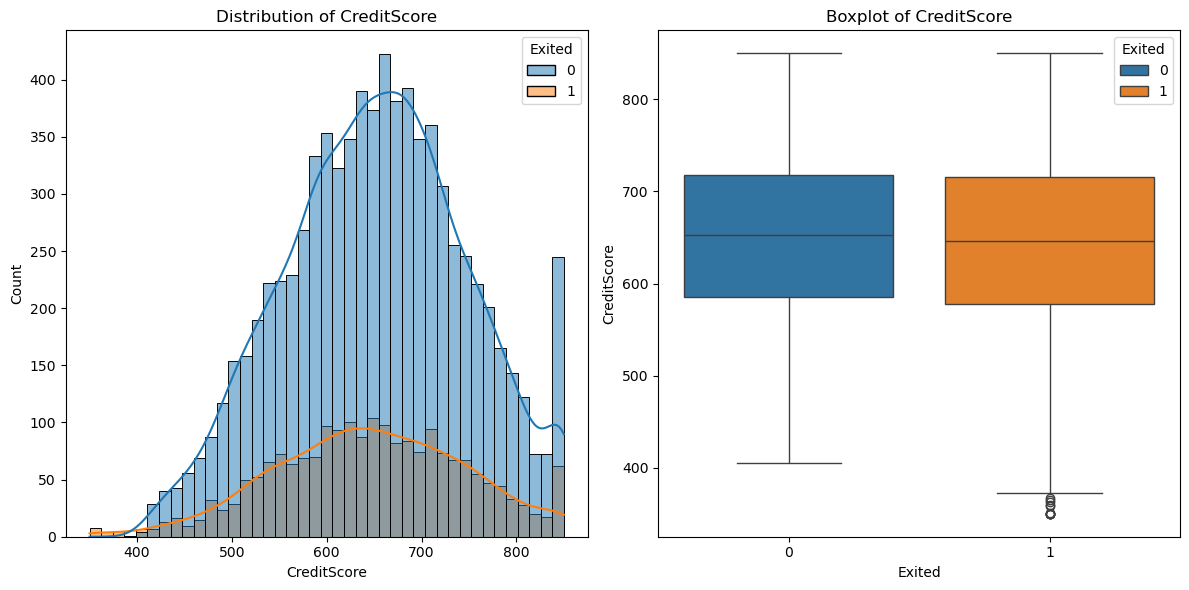

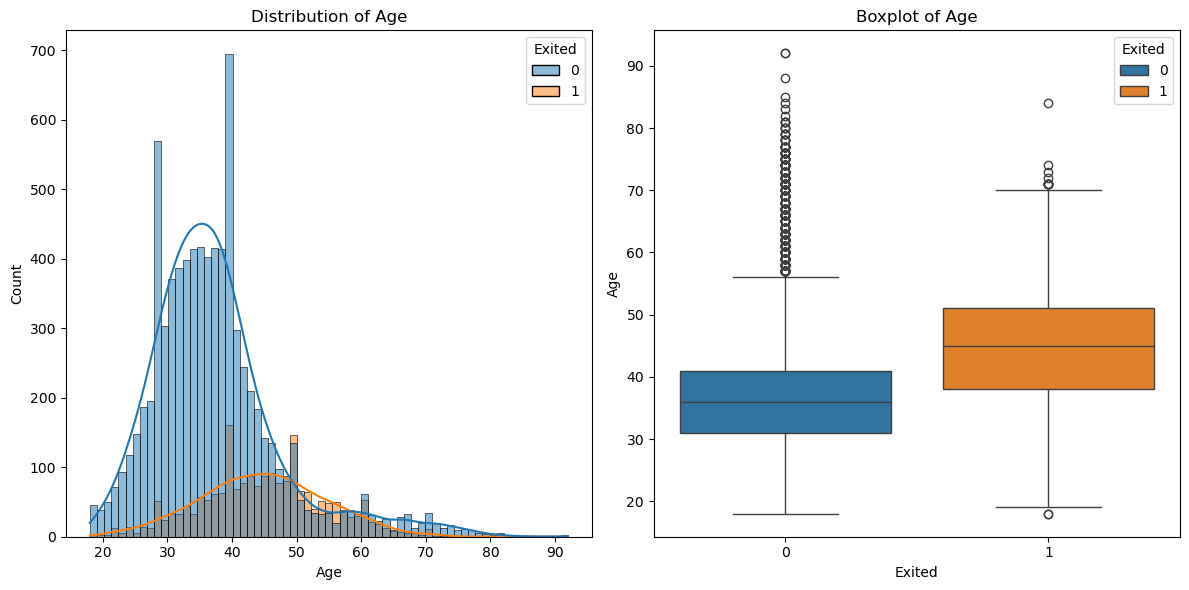

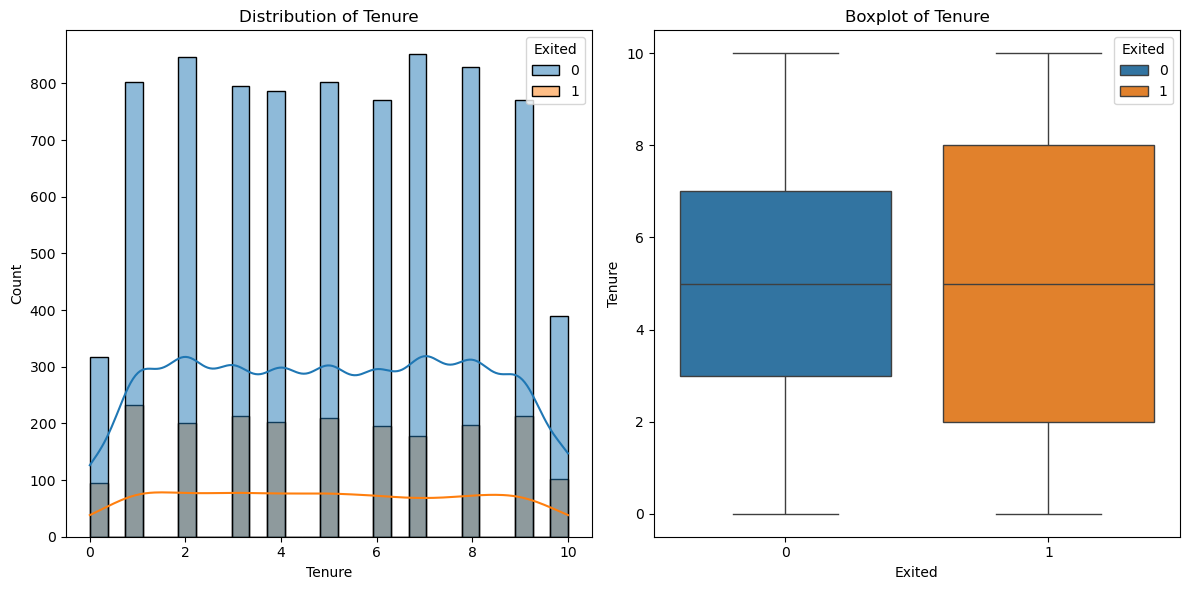

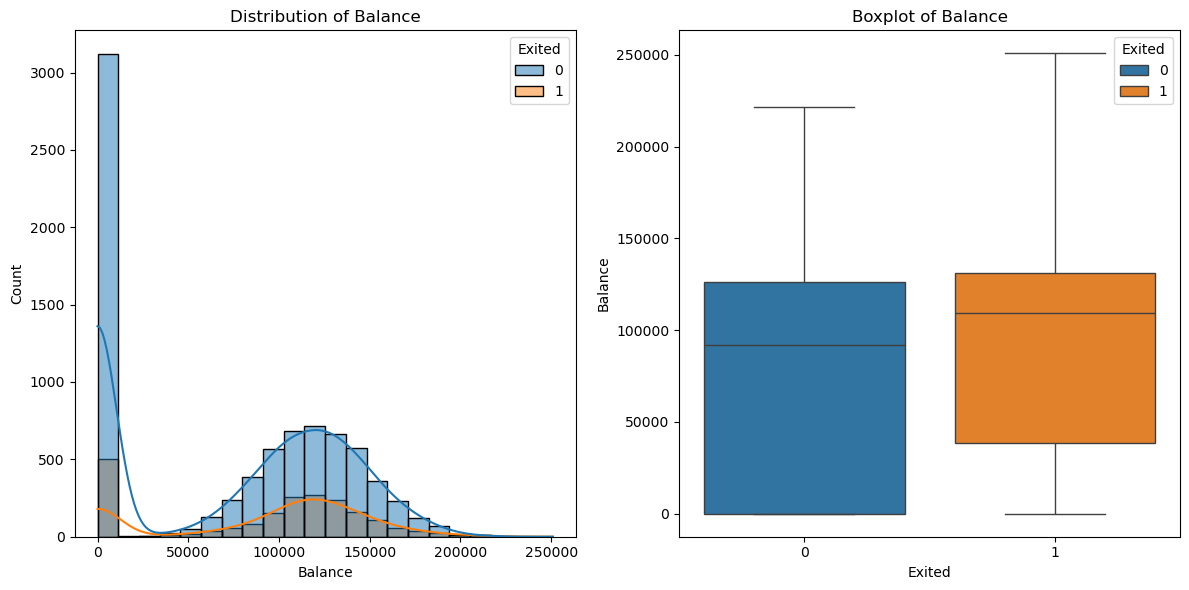

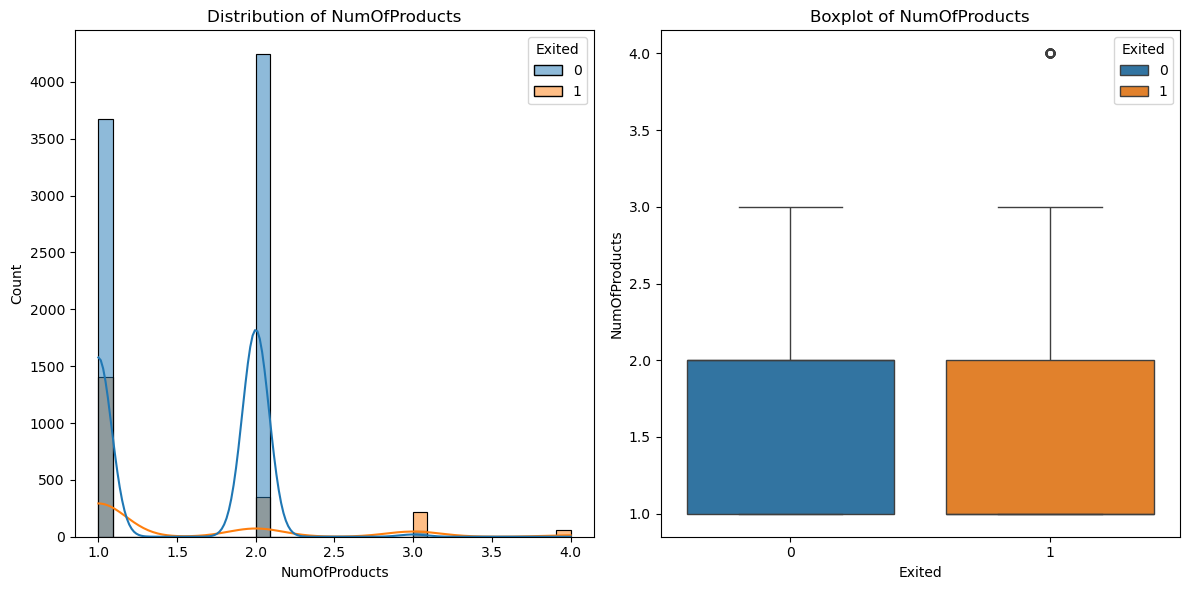

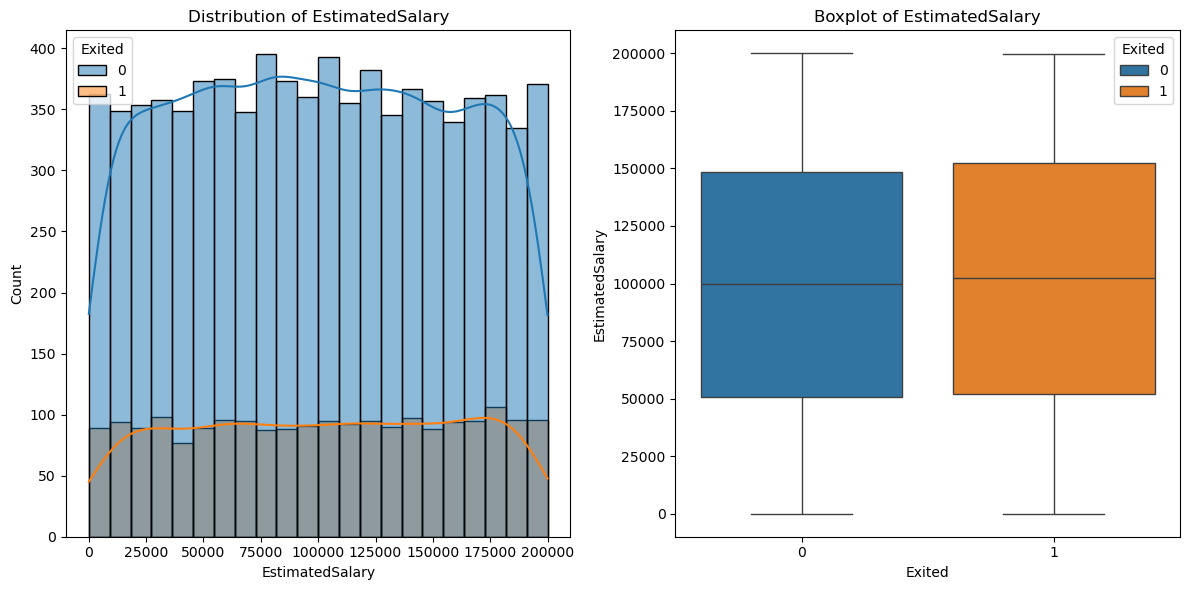

In [146]:
# Distribution of the numerical columnes

# Selection of numerical columns
df_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of distributions
for column in df_numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Distribution with distplot
    plt.subplot(1, 2, 1) # one row, two columns, first column from the left
    sns.histplot(data=df, x=column, kde=True, hue='Exited')
    #sns.histplot(features_with_target[column], kde=True, hue='Exited'  )
    plt.title(f'Distribution of {column}')
    
    # Boxplot to identify outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y=df[column], data=df, hue='Exited')
    #sns.boxplot(x=features_with_target[column], hue='Exited')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()


In [147]:
# dealing with outliers:

# there is no impossible values in data set

### Visualizing relationships between features with pairplot, categorized by churn status

In [148]:
# pairplot
# pairplot = sns.pairplot(df, hue = 'Exited',diag_kws={'common_norm': True})

### Conclusions
After the first glance, churn is mostly observed for:
- Age between 40 and 65
- NumOfProducts of 3 and more
- CreditScore of less than 400
        

### Correlations

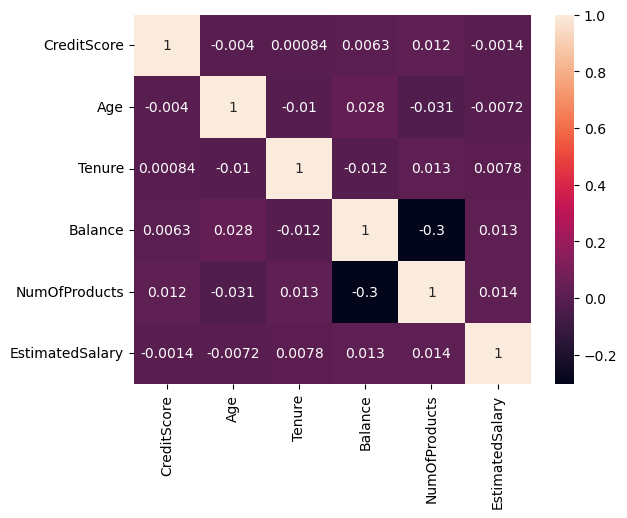

In [149]:
# Correlated features

# Selecting numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Correlation visualization
sns.heatmap(numerical_df.corr(), annot=True);

In [150]:
numerical_df.corr().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


### Conclusions
The correlations between numerical values are week. The highest is -0.30 between NumOfProducts and Balance.   
It is probably due to the fact that they are synthetic data.

## Checking the balance of the target categories

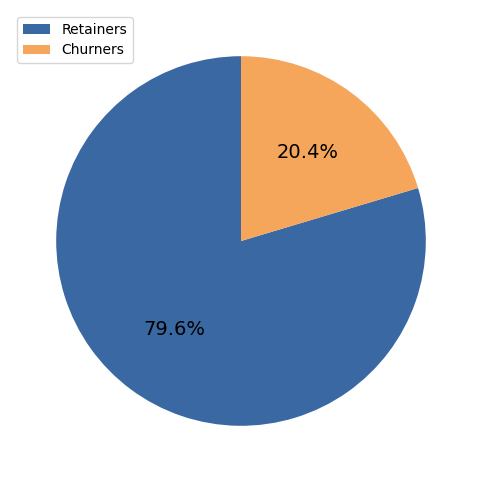

In [151]:
# target data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count']  # transform the crosstab into a simple series for the pie chart
labels = ['Retainers', 'Churners']  # 0: Retainers, 1: Churners

# pie chart
plt.figure(figsize=(6, 6))
colors = ['#3a68a2', '#f5a65b']
plt.pie(
    pie_data, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 14}
)
plt.legend(labels, loc="upper left")
plt.show()

In [162]:
# definiujemy funkcjie ktora bedzie robic cleanning for feature_train and feature_test

def clean_data(df):
    """Returns cleaned DataFrame.
    
    Processes:
        -removing irrelevant columnes
        -transform data into less demanding formats
        
    
    Args: 
        df (pd.DataFrame) : uncleaned DataFrame
        
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    
    """

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # removing unnecessary columns
    df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
    
    # convert 'object' to 'category' type
    category_columns = ['Geography']
    for column in category_columns:
        df[column] = df[column].astype('category')

    # convert 'object' to numerical columns
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

    # convert numerical columns: data type optimization
    df['Gender'] = df['Gender'].astype('uint8')
    df['HasCrCard'] = df['HasCrCard'].astype('uint8')
    df['IsActiveMember'] = df['IsActiveMember'].astype('uint8')
    df['Age'] = df['Age'].astype('uint8')
    df['Tenure'] = df['Tenure'].astype('uint8')
    df['NumOfProducts'] = df['NumOfProducts'].astype('uint8')
    df['CreditScore'] = df['CreditScore'].astype('uint16')
        
    return df

In [163]:
# perform train-test-split
df = pd.read_csv("Churn_Modelling.csv")

from sklearn.model_selection import train_test_split

target = df.loc[:,'Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

In [164]:
features_test.to_csv('features_test.csv', index=False)

In [165]:
#df = features_train.copy() #######

In [166]:
features_train_cleaned = clean_data(features_train)
features_test_cleaned = clean_data(features_test)

display(features_train_cleaned)
features_train_cleaned.info();

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4896,605,France,0,41,5,91612.91,1,1,1,28427.84
4782,752,France,1,53,8,114233.18,1,1,1,51587.04
1496,569,Spain,0,38,8,0.00,2,0,0,79618.79
1957,710,France,0,54,6,171137.62,1,1,1,167023.95
9171,411,France,1,54,9,0.00,1,0,1,76621.49
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,0,54,8,69712.74,1,1,1,69381.05
5191,682,France,1,58,1,0.00,1,1,1,706.50
5390,735,France,1,38,1,0.00,3,0,0,92220.12
860,667,France,0,43,8,190227.46,1,1,0,97508.04


<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9000 non-null   uint16  
 1   Geography        9000 non-null   category
 2   Gender           9000 non-null   uint8   
 3   Age              9000 non-null   uint8   
 4   Tenure           9000 non-null   uint8   
 5   Balance          9000 non-null   float64 
 6   NumOfProducts    9000 non-null   uint8   
 7   HasCrCard        9000 non-null   uint8   
 8   IsActiveMember   9000 non-null   uint8   
 9   EstimatedSalary  9000 non-null   float64 
dtypes: category(1), float64(2), uint16(1), uint8(6)
memory usage: 290.2 KB


In [167]:
 # defining function resample_data()

def resample_data(x, y):
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    features_resampled, target_resampled = ros.fit_resample(x, y)
    pd.crosstab(index=target_resampled,
            columns='count')
    return  features_resampled, target_resampled 

In [168]:
# applying function resample_data()
features_train_resampled, target_train_resampled = resample_data(features_train_cleaned, target_train)

# checking balance after resampling
pd.crosstab(index=target_train_resampled,
            columns='count')

col_0,count
Exited,
0,7154
1,7154


In [169]:
features_train_resampled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [170]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Definiowanie kolumn
categorical_columns = ['Geography']
boolean_columns = [
                   'HasCrCard', 
                   'IsActiveMember', 
                   'Gender']
numerical_columns = [
                     'CreditScore',
                     'Age',
                     'Tenure',
                     'Balance', 
                     'NumOfProducts', 
                     'EstimatedSalary']  

#polynomial_columnes = [''Age', 'Balance', EstimatedSalary', 'CreditScore]

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        # polynomials
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [171]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier()) # Klasyfikator RandomForest
])  

In [172]:
from sklearn.metrics import classification_report  # Importowanie funkcji do generowania raportu klasyfikacji
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [173]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       809
           1       0.63      0.54      0.58       191

    accuracy                           0.85      1000
   macro avg       0.76      0.73      0.75      1000
weighted avg       0.84      0.85      0.85      1000

Confusion Matrix:
 [[747  62]
 [ 87 104]]

roc_auc: 0.8564157158666571


In [210]:
# Grid search for Random Forest Pipe
# Grid search for Random Forest Pipe
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        n_estimators=50,  # number of decision trees
        random_state=42
    ))
])

# Poprawiona przestrzeń przeszukiwania
search_space_rf = {
    'classifier__max_depth': np.round(np.geomspace(start=3, stop=50, num=10)).astype(int),
    'classifier__min_samples_leaf': [1, 2, 4, 8, 16, 20]  # Można rozszerzyć z logspace
}

# GridSearchCV z optymalizacją CPU
rf_grid_search = GridSearchCV(
    estimator=r_forest_pipe,
    param_grid=search_space_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1  # Przyspiesza obliczenia
)

rf_grid_search.fit(features_train_resampled, target_train_resampled)

print(rf_grid_search.best_estimator_)
print(rf_grid_search.best_score_)
#print(rf_grid_search.best_estimator_.get_params())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance', 'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember'])])),
                ('classifier'

In [175]:
#model_rf.cv_results_.keys()
#pd.DataFrame(model_rf.cv_results_)

In [211]:
# Random Forest Pipe with best estimators from Grid Search
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', RandomForestClassifier(class_weight='balanced',
                                          max_depth=27,
                                          n_estimators=50,
                                          random_state=42))  # Klasyfikator RandomForest
])

r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       809
           1       0.61      0.54      0.58       191

    accuracy                           0.85      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [177]:
# Uczenie modelu
r_forest_pipe.fit(features_train_resampled, target_train_resampled)

# Wyciąganie RandomForestClassifier z potoku
rf_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = rf_model.feature_importances_

# Uzyskiwanie nazw cech po transformacjach
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = r_forest_pipe.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne
num_columns = r_forest_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

# 3. Kolumny boolowskie (nie przekształcone)
bool_columns = ['HasCrCard', 'IsActiveMember', 'Gender']

# Połączenie wszystkich nazw cech
all_columns = list(geography_columns) + list(num_columns) + bool_columns

# Połączenie nazw cech z ich istotnościami
feature_importances_with_names = zip(all_columns, importances)

# Posortowanie cech według istotności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych wyników z zaokrągleniem do 2 miejsc po przecinku i przekształcenie na procenty
print('Features importance:')
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Przekształcenie na procenty
    print(f"{feature}: {importance_percent}%")




Features importance:
Age: 26.32%
Balance: 14.02%
EstimatedSalary: 13.74%
CreditScore: 13.56%
NumOfProducts: 12.57%
Tenure: 7.98%
IsActiveMember: 3.63%
Geography_Germany: 2.4%
Gender: 2.07%
HasCrCard: 1.86%
Geography_France: 0.98%
Geography_Spain: 0.87%


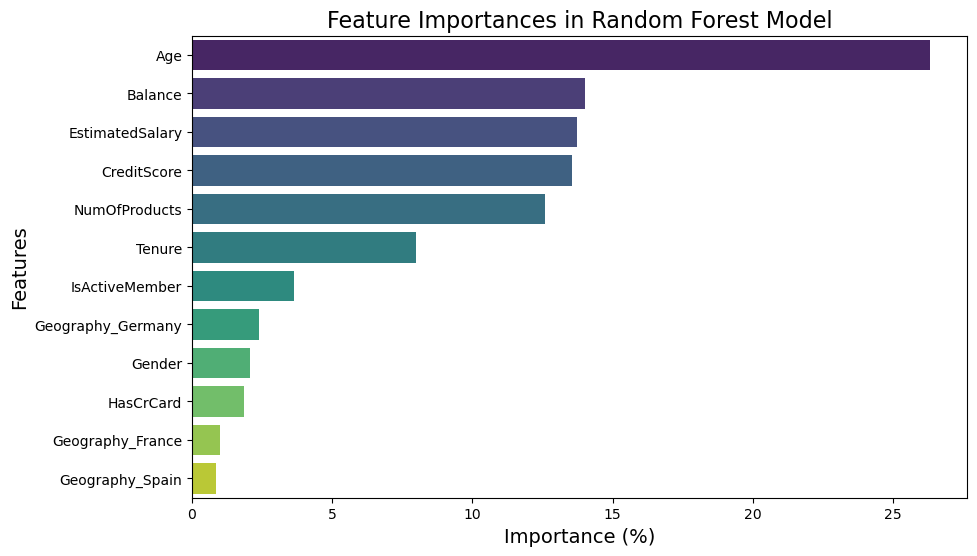

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uzyskiwanie danych z posortowanymi nazwami cech i ich istotnościami
features = [feature for feature, _ in sorted_feature_importances]
importances_percent = [round(importance * 100, 2) for _, importance in sorted_feature_importances]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_percent, y=features, palette='viridis')

# Tytuł wykresu
plt.title("Feature Importances in Random Forest Model", fontsize=16)
plt.xlabel("Importance (%)", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Wyświetlenie wykresu
plt.show()


In [179]:
# Pipeline for k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier())  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       809
           1       0.41      0.73      0.53       191

    accuracy                           0.75      1000
   macro avg       0.67      0.74      0.68      1000
weighted avg       0.83      0.75      0.77      1000



In [180]:
# preparing search grid for knn

k = np.unique(np.geomspace(1, 500, 15, dtype='int'))  # create 15 values between 1 and 500 with increasing distance
search_space_knn = {'classifier__n_neighbors': k,  # use the created values as number of neighbors
                    'classifier__weights': ['uniform', 'distance']}

search_space_knn

{'classifier__n_neighbors': array([  1,   2,   3,   5,   9,  14,  22,  34,  54,  84, 132, 205, 320,
        500]),
 'classifier__weights': ['uniform', 'distance']}

In [181]:
# grid search for knn

# knn_grid_search
knn_grid_search = GridSearchCV(estimator=knn_pipe, 
                         param_grid=search_space_knn, 
                         scoring='f1',
                         cv=5)

knn_grid_search.fit(features_train_resampled, target_train_resampled)

print(knn_grid_search.best_estimator_)
print(knn_grid_search.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                          

In [182]:
# Pipeline for k-Nearest Neighbors with best estimator

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier(n_neighbors=1))  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       809
           1       0.49      0.49      0.49       191

    accuracy                           0.81      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.81      0.81      0.81      1000



In [183]:
# Pipeline for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression())  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.71      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.71      0.74      1000



In [184]:
# Pipeline 2 for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg_pipe_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(solver='saga',
                                      class_weight='balanced',
                                      max_iter=10000,
                                      random_state=42))  # Klasyfikator Logistic Regression
])

# preparing grid search for log_reg
C_values = np.geomspace(start=0.001, stop=1000, num=14)

search_space_log = {'classifier__penalty': ['l1', 'l2'],
                    'classifier__C': C_values
                   }
search_space_log

{'classifier__penalty': ['l1', 'l2'],
 'classifier__C': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03])}

In [185]:
# running grid serch for log_reg
log_grid_search = GridSearchCV(estimator=log_reg_pipe_2,
                         param_grid=search_space_log,
                         scoring='f1', #  for Exited = 1
                         cv=5)

log_grid_search.fit(features_train_resampled, target_train_resampled)

print(log_grid_search.best_estimator_)
print(log_grid_search.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                          

In [186]:
# Pipeline for Logistic Regression Model with best estimator

from sklearn.linear_model import LogisticRegression
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(C=0.008376776400682925,
                                      class_weight='balanced', 
                                      max_iter=10000,
                                      random_state=42, 
                                      solver='saga'))  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.72      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.72      0.74      1000



In [187]:
from sklearn.preprocessing import PolynomialFeatures

# Definiowanie kolumn
categorical_columns = ['Geography']  # Kolumny kategoryczne
boolean_columns = ['HasCrCard', 'IsActiveMember', 'Gender']  # Kolumny logiczne
numerical_columns = [
                    'Tenure',
                    'NumOfProducts'
                    ]  # Kolumny numeryczne

polynomial_columnes = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Pipeline dla polynomial columns
poly_pipe = Pipeline(steps=[('std', StandardScaler()), 
                            ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))])

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        ('pol', poly_pipe, polynomial_columnes),
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [188]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier()) # Klasyfikator RandomForest
])  

In [189]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       809
           1       0.62      0.48      0.54       191

    accuracy                           0.84      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.83      0.84      0.84      1000

Confusion Matrix:
 [[752  57]
 [ 99  92]]

roc_auc: 0.8382367216976552


In [190]:
# Przekształcenie danych treningowych za pomocą preprocessor
transformed_train_features = preprocessor.fit_transform(features_train_cleaned)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
transformed_test_features = preprocessor.transform(features_test_cleaned)

# Pobranie nazw kolumn po każdej transformacji:
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne po standaryzacji
num_columns = numerical_columns  # Standaryzacja nie zmienia nazw kolumn

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[2][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie (przepuszczone bez zmian)
bool_columns = boolean_columns

# Połączenie nazw wszystkich cech w odpowiedniej kolejności
all_transformed_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Tworzenie DataFrame z przekształconymi danymi treningowymi
transformed_train_df = pd.DataFrame(transformed_train_features, columns=all_transformed_columns)

# Tworzenie DataFrame z przekształconymi danymi testowymi
transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

# Wyświetlenie pełnego DataFrame dla danych treningowych
display(transformed_train_df)

# Wyświetlenie pełnego DataFrame dla danych testowych
display(transformed_test_df)


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,1.0,0.0,0.0,-0.002346,-0.913645,0.196872,0.249695,-1.241417,-0.479443,0.038759,...,-0.094389,0.062348,-0.309976,-0.119715,1.541117,0.595189,0.229866,1.0,1.0,0.0
1,1.0,0.0,0.0,1.036257,-0.913645,1.338037,0.611930,-0.838930,1.045809,1.790342,...,1.399330,0.374459,-0.513367,0.639962,0.703804,-0.877360,1.093716,1.0,1.0,1.0
2,0.0,0.0,1.0,1.036257,0.807688,-0.088419,-1.217369,-0.351762,-0.852974,0.007818,...,0.075419,1.481987,0.428225,1.038384,0.123737,0.300044,0.727565,0.0,0.0,0.0
3,1.0,0.0,0.0,0.343855,-0.913645,1.433134,1.523182,1.167264,0.610022,2.053872,...,0.874244,2.320084,1.777956,0.929175,1.362506,0.712057,0.372127,1.0,1.0,0.0
4,1.0,0.0,0.0,1.382458,-0.913645,1.433134,-1.217369,-0.403853,-2.492361,2.053872,...,-3.571886,1.481987,0.491638,3.034122,0.163097,1.006547,6.211862,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.0,0.0,0.0,1.036257,-0.913645,1.433134,-0.101008,-0.529686,1.211822,2.053872,...,1.736703,0.010203,0.053502,-0.122404,0.280567,-0.641885,1.468514,1.0,1.0,0.0
8996,1.0,0.0,0.0,-1.387151,-0.913645,1.813522,-1.217369,-1.723190,0.319498,3.288861,...,0.579417,1.481987,2.097758,-0.388947,2.969385,-0.550556,0.102079,1.0,1.0,1.0
8997,1.0,0.0,0.0,-1.387151,2.529021,-0.088419,-1.217369,-0.132762,0.869419,0.007818,...,-0.076873,1.481987,0.161620,-1.058403,0.017626,-0.115426,0.755889,0.0,0.0,1.0
8998,1.0,0.0,0.0,1.036257,-0.913645,0.387066,1.828882,-0.040863,0.163860,0.149820,...,0.063425,3.344809,-0.074733,0.299681,0.001670,-0.006696,0.026850,1.0,0.0,0.0


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,0.0,1.0,0.0,-0.694749,0.807688,-0.659001,0.331304,-1.009223,-0.572826,0.434283,...,0.377493,0.109762,-0.334359,-0.189779,1.018530,0.578109,0.328130,0.0,0.0,0.0
1,1.0,0.0,0.0,-1.387151,0.807688,0.387066,-1.217369,0.808478,-0.292678,0.149820,...,-0.113286,1.481987,-0.984216,0.356297,0.653637,-0.236624,0.085660,1.0,1.0,0.0
2,0.0,0.0,1.0,-0.348548,0.807688,0.482163,-1.217369,-0.717723,-0.520947,0.232481,...,-0.251181,1.481987,0.873734,0.634184,0.515127,0.373896,0.271386,1.0,0.0,1.0
3,0.0,1.0,0.0,1.036257,0.807688,1.908619,0.690700,1.230799,-1.506654,3.642826,...,-2.875628,0.477067,0.850113,-1.040646,1.514866,-1.854388,2.270006,1.0,1.0,0.0
4,0.0,0.0,1.0,0.690056,-0.913645,-1.134487,0.784283,0.257394,-0.946357,1.287060,...,1.073630,0.615099,0.201870,-0.742212,0.066252,-0.243587,0.895592,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,-0.694749,0.807688,1.908619,-1.217369,-1.286327,-0.873726,3.642826,...,-1.667610,1.481987,1.565935,1.063647,1.654638,1.123898,0.763397,1.0,0.0,0.0
996,1.0,0.0,0.0,1.036257,0.807688,-0.468807,-1.217369,-1.065153,-0.157792,0.219780,...,0.073974,1.481987,1.296684,0.192090,1.134551,0.168072,0.024898,1.0,0.0,0.0
997,1.0,0.0,0.0,-0.694749,-0.913645,-1.229584,0.673818,-0.670860,0.402505,1.511876,...,-0.494914,0.454031,-0.452038,0.271215,0.450053,-0.270025,0.162010,1.0,0.0,1.0
998,0.0,0.0,1.0,-0.694749,-0.913645,0.482163,0.206505,-0.524182,-2.066950,0.232481,...,-0.996607,0.042644,-0.108246,-0.426836,0.274766,1.083458,4.272284,1.0,0.0,0.0


In [191]:
# Dopasowanie r_forest_pipe do danych treningowych
r_forest_pipe.fit(features_train_resampled, target_train_resampled)

# Wyciąganie modelu RandomForestClassifier z pipeline
rf_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = rf_model.feature_importances_

# Uzyskiwanie nazw cech po przetwarzaniu
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne
num_columns = numerical_columns  # Nazwy pozostają takie same po standaryzacji

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[2][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie
bool_columns = boolean_columns

# Połączenie wszystkich nazw cech w odpowiedniej kolejności
all_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Połączenie nazw cech z ich ważnościami
feature_importances_with_names = list(zip(all_columns, importances))

# Posortowanie cech według ważności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych cech z ich ważnościami
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Konwersja na procenty
    print(f"{feature}: {importance_percent}%")


Feature Importances:
Age: 14.61%
NumOfProducts: 10.79%
Age Balance: 7.39%
Balance: 5.58%
Age EstimatedSalary: 4.9%
Age CreditScore: 4.81%
EstimatedSalary^2: 4.71%
Balance^2: 4.62%
Balance EstimatedSalary: 4.6%
Balance CreditScore: 4.56%
EstimatedSalary: 4.56%
EstimatedSalary CreditScore: 4.55%
CreditScore^2: 4.41%
CreditScore: 4.37%
Age^2: 3.92%
Tenure: 3.01%
IsActiveMember: 2.92%
Geography_Germany: 2.1%
Gender: 1.37%
Geography_France: 0.83%
HasCrCard: 0.76%
Geography_Spain: 0.64%


In [192]:
for feature, importance in sorted_feature_importances:
    print(feature)

Age
NumOfProducts
Age Balance
Balance
Age EstimatedSalary
Age CreditScore
EstimatedSalary^2
Balance^2
Balance EstimatedSalary
Balance CreditScore
EstimatedSalary
EstimatedSalary CreditScore
CreditScore^2
CreditScore
Age^2
Tenure
IsActiveMember
Geography_Germany
Gender
Geography_France
HasCrCard
Geography_Spain


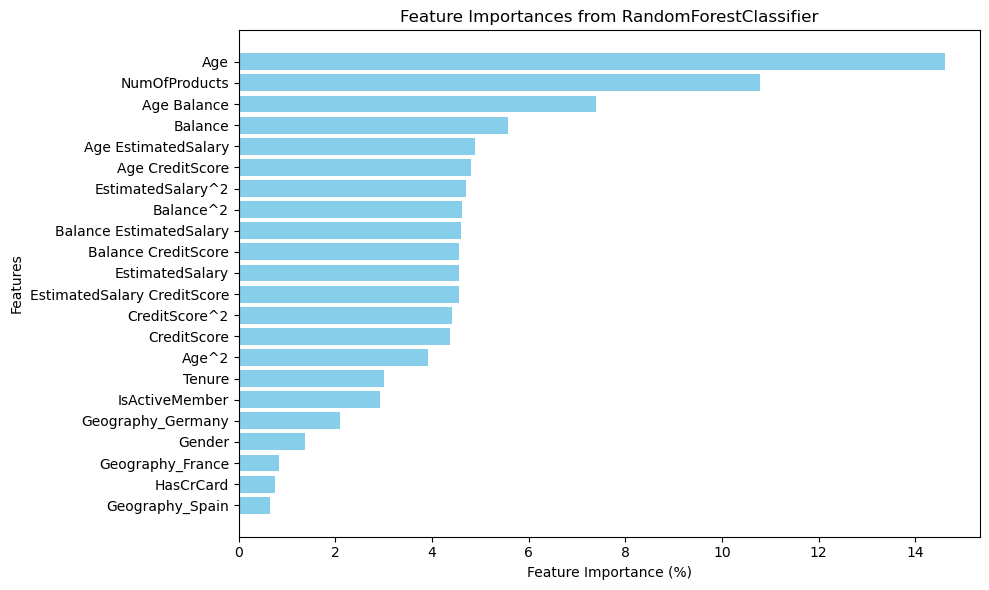

In [193]:
import matplotlib.pyplot as plt

# Ekstrakcja nazw cech i ich ważności z posortowanej listy
features, importances = zip(*sorted_feature_importances)

# Konwersja ważności na procenty
importances_percent = [round(imp * 100, 2) for imp in importances]

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.barh(features, importances_percent, color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Feature Importances from RandomForestClassifier")
plt.gca().invert_yaxis()  # Odwrócenie osi Y, aby najważniejsze cechy były na górze
plt.tight_layout()
plt.show()


In [194]:
# Przekształcenie danych treningowych za pomocą preprocessor
transformed_train_features = preprocessor.fit_transform(features_train_resampled)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
transformed_test_features = preprocessor.transform(features_test_cleaned)

# Pobranie nazw kolumn po każdej transformacji:
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne po standaryzacji
num_columns = numerical_columns  # Standaryzacja nie zmienia nazw kolumn

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[2][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie (przepuszczone bez zmian)
bool_columns = boolean_columns

# Połączenie nazw wszystkich cech w odpowiedniej kolejności
all_transformed_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Tworzenie DataFrame z przekształconymi danymi treningowymi
transformed_train_df = pd.DataFrame(transformed_train_features, columns=all_transformed_columns)

# Tworzenie DataFrame z przekształconymi danymi testowymi
transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

# Wyświetlenie pełnego DataFrame dla danych treningowych
display(transformed_train_df)

# Wyświetlenie pełnego DataFrame dla danych testowych
display(transformed_test_df)

,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,1.0,0.0,0.0,0.009318,-0.761135,-0.015413,0.169899,-1.255755,-0.456285,0.000238,...,0.007033,0.028866,-0.213351,-0.077522,1.576920,0.572982,0.208196,1.0,1.0,0.0
1,1.0,0.0,0.0,1.042847,-0.761135,1.115015,0.538914,-0.853894,1.043049,1.243257,...,1.163015,0.290428,-0.460176,0.562114,0.729136,-0.890654,1.087951,1.0,1.0,1.0
2,0.0,0.0,1.0,1.042847,0.743676,-0.298020,-1.324627,-0.367485,-0.823469,0.088816,...,0.245410,1.754636,0.486781,1.090789,0.135045,0.302613,0.678101,0.0,0.0,0.0
3,1.0,0.0,0.0,0.353828,-0.761135,1.209217,1.467224,1.149176,0.614668,1.462205,...,0.743266,2.152745,1.686099,0.901855,1.320606,0.706362,0.377816,1.0,1.0,0.0
4,1.0,0.0,0.0,1.387357,-0.761135,1.209217,-1.324627,-0.419495,-2.434998,1.462205,...,-2.944441,1.754636,0.555674,3.225463,0.175976,1.021469,5.929216,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14303,0.0,1.0,0.0,-1.024210,-0.761135,0.644003,0.424956,0.050583,-0.160498,0.414740,...,-0.103361,0.180588,0.021496,-0.068205,0.002559,-0.008118,0.025760,1.0,1.0,0.0
14304,0.0,1.0,0.0,0.698337,-0.761135,0.078789,0.400078,-0.177663,0.308681,0.006208,...,0.024321,0.160063,-0.071079,0.123497,0.031564,-0.054841,0.095284,1.0,1.0,1.0
14305,1.0,0.0,0.0,1.731866,-0.761135,-0.203817,-1.324627,1.041366,-2.496196,0.041542,...,0.508768,1.754636,-1.379421,3.306527,1.084444,-2.599454,6.230992,1.0,0.0,0.0
14306,1.0,0.0,0.0,-1.368720,-0.761135,-0.392222,1.118514,-1.391074,0.543271,0.153838,...,-0.213083,1.251074,-1.555936,0.607656,1.935087,-0.755730,0.295143,1.0,0.0,0.0


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,0.0,1.0,0.0,-0.679701,0.743676,-0.863233,0.253035,-1.023922,-0.548081,0.745172,...,0.473122,0.064027,-0.259088,-0.138684,1.048416,0.561192,0.300393,0.0,0.0,0.0
1,1.0,0.0,0.0,-1.368720,0.743676,0.172992,-1.324627,0.790949,-0.272693,0.029926,...,-0.047174,1.754636,-1.047712,0.361217,0.625600,-0.215686,0.074362,1.0,1.0,0.0
2,0.0,0.0,1.0,-0.335191,0.743676,0.267194,-1.324627,-0.732876,-0.497083,0.071393,...,-0.132818,1.754636,0.970787,0.658450,0.537108,0.364301,0.247092,1.0,0.0,1.0
3,0.0,1.0,0.0,1.042847,0.743676,1.680228,0.619159,1.212612,-1.466041,2.823167,...,-2.463283,0.383358,0.750799,-0.907712,1.470428,-1.777739,2.149276,1.0,1.0,0.0
4,0.0,0.0,1.0,0.698337,-0.761135,-1.334245,0.714493,0.240723,-0.915265,1.780209,...,1.221188,0.510500,0.171995,-0.653950,0.057947,-0.220325,0.837710,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,-0.679701,0.743676,1.680228,-1.324627,-1.300595,-0.843868,2.823167,...,-1.417891,1.754636,1.722803,1.117810,1.691547,1.097531,0.712114,1.0,0.0,0.0
996,1.0,0.0,0.0,1.042847,0.743676,-0.674829,-1.324627,-1.079765,-0.140099,0.455394,...,0.094543,1.754636,1.430285,0.185579,1.165892,0.151274,0.019628,1.0,0.0,0.0
997,1.0,0.0,0.0,-0.679701,-0.761135,-1.428447,0.601961,-0.686086,0.410677,2.040461,...,-0.586630,0.362357,-0.412997,0.247211,0.470714,-0.281760,0.168655,1.0,0.0,1.0
998,0.0,0.0,1.0,-0.679701,-0.761135,0.267194,0.125900,-0.539636,-2.016817,0.071393,...,-0.538881,0.015851,-0.067940,-0.253918,0.291207,1.088347,4.067549,1.0,0.0,0.0


In [195]:
# Usunięcie kolumn 'Age' oraz 'NumOfProducts' z DataFrame
columns_to_drop = [

'Balance CreditScore',
'EstimatedSalary',
'EstimatedSalary CreditScore',
'CreditScore^2',
'CreditScore',
'Age^2',
'Tenure',
'IsActiveMember',
'Geography_Germany',
'Gender',
'Geography_France',
'HasCrCard',
'Geography_Spain']

columns_to_keep = [
'Age',
'NumOfProducts',
'Age Balance',
'Balance',
'Age EstimatedSalary',
'Balance^2',
'Age EstimatedSalary',
'Balance^2',
'Balance EstimatedSalary',
'Age CreditScore',
'EstimatedSalary^2',
]
transformed_train_features_reduced = transformed_train_df[columns_to_keep]
transformed_test_features_reduced = transformed_test_df[columns_to_keep]

In [196]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[    ('classifier', RandomForestClassifier())]) # Klasyfikator RandomForest

In [197]:
# evaluation of prediction
r_forest_pipe.fit(X=transformed_train_features_reduced, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=transformed_test_features_reduced)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
#roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
#print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       809
           1       0.54      0.46      0.50       191

    accuracy                           0.82      1000
   macro avg       0.71      0.68      0.70      1000
weighted avg       0.81      0.82      0.82      1000

Confusion Matrix:
 [[735  74]
 [103  88]]


In [198]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Definiowanie kolumn
categorical_columns = [
                       'Geography'
                       ]  # Kolumny kategoryczne
boolean_columns = [
                   'HasCrCard', 
                   'IsActiveMember', 
                   #'Gender'
                   ]  # Kolumny logiczne
numerical_columns = [
                    'CreditScore',
                     'Age',
                    # 'Tenure',
                     'Balance', 
                     'NumOfProducts', 
                     'EstimatedSalary'
                     ]  # Kolumny numeryczne
#polynomial_columnes = [''Age', 'Balance', EstimatedSalary', 'CreditScore]

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        # polynomials
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [199]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier())]) # Klasyfikator RandomForest

In [200]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       809
           1       0.66      0.56      0.60       191

    accuracy                           0.86      1000
   macro avg       0.78      0.75      0.76      1000
weighted avg       0.85      0.86      0.86      1000

Confusion Matrix:
 [[753  56]
 [ 84 107]]

roc_auc: 0.8487143975821743


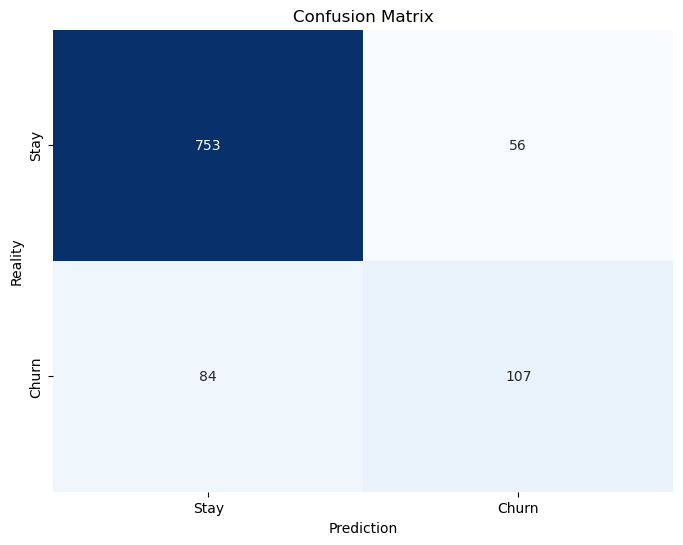

In [201]:
# Select model

plt.figure(figsize=(8, 6))  # Figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])

# Title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()

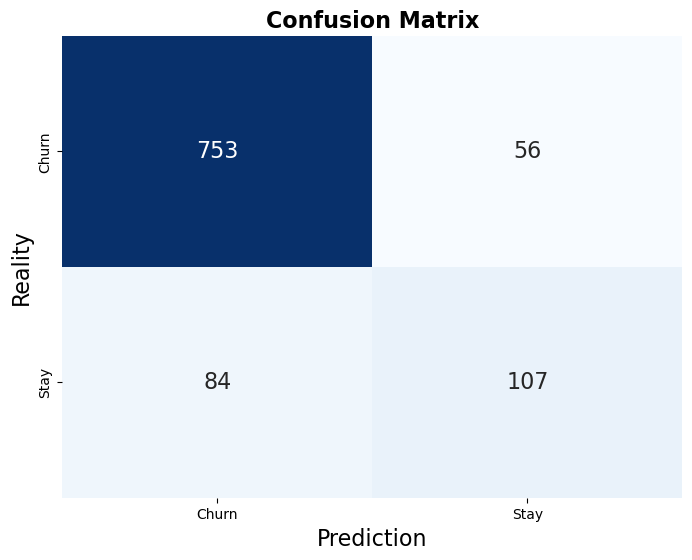

In [202]:
# Select model

plt.figure(figsize=(8, 6))  # Figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Churn', 'Stay'], yticklabels=['Churn', 'Stay'],
            annot_kws={'size': 16})  # Zwiększony rozmiar czcionki wewnątrz komórek

# Title and axis labels
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediction', fontsize=16)
plt.ylabel('Reality', fontsize=16)
plt.show()



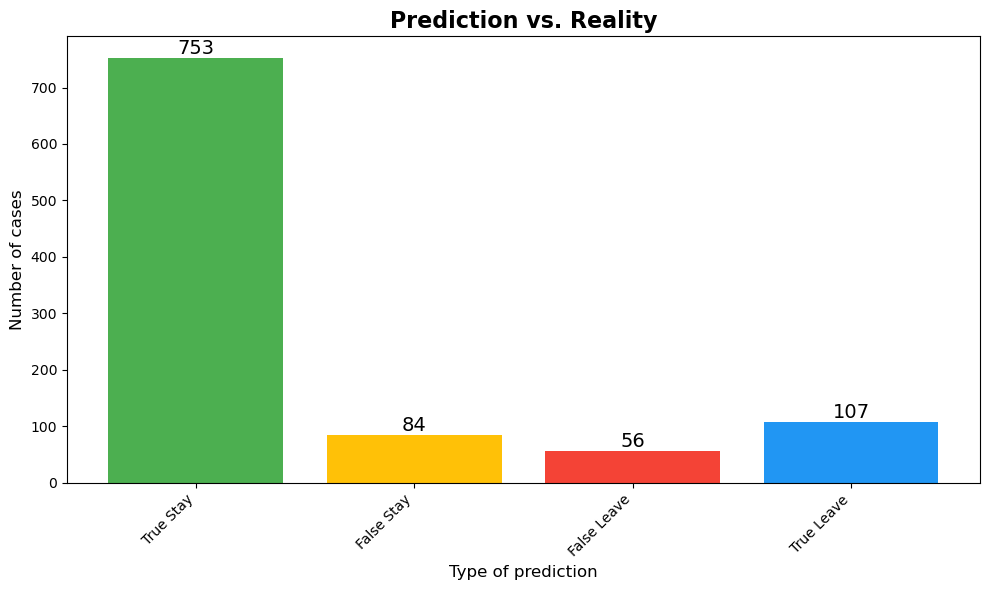

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładamy, że conf_matrix to twoja macierz konfuzji
# conf_matrix = np.array([[TP, FN], [FP, TN]])

fig, ax = plt.subplots(figsize=(10, 6))

labels = ['True Stay', 'False Stay', 'False Leave', 'True Leave']
sizes = [conf_matrix[0, 0], conf_matrix[1, 0], conf_matrix[0, 1], conf_matrix[1, 1]]
colors = ['#4CAF50', '#FFC107', '#F44336', '#2196F3']

ax.bar(labels, sizes, color=colors)

plt.title('Prediction vs. Reality', fontsize=16, fontweight='bold')
plt.xlabel('Type of prediction', fontsize=12)
plt.ylabel('Number of cases', fontsize=12)

# Dodanie etykiet z wartościami na słupkach
for i, v in enumerate(sizes):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


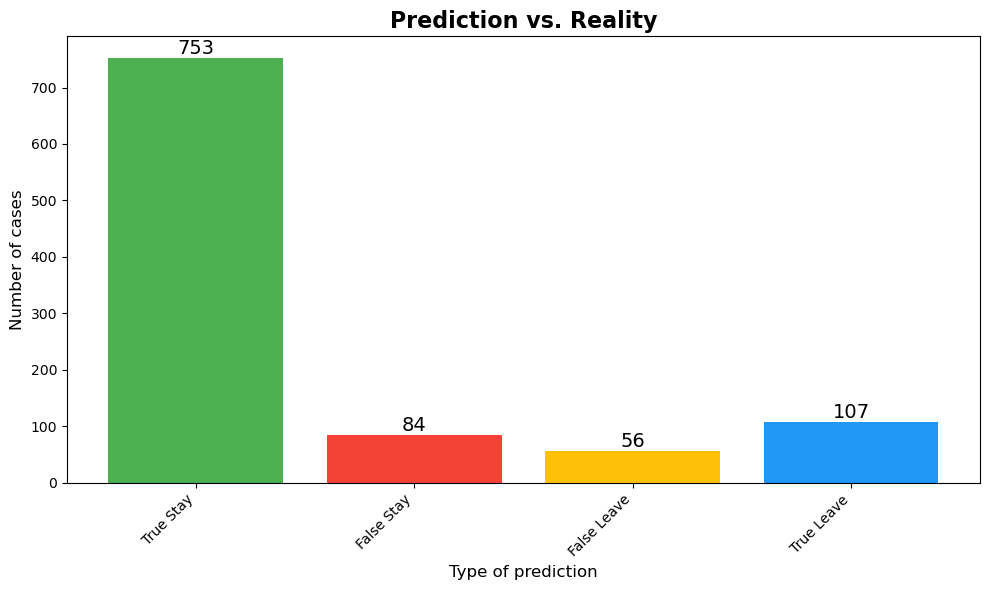

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładamy, że conf_matrix to twoja macierz konfuzji
# conf_matrix = np.array([[TP, FN], [FP, TN]])

fig, ax = plt.subplots(figsize=(10, 6))

labels = ['True Stay', 'False Stay', 'False Leave', 'True Leave']
sizes = [conf_matrix[0, 0], conf_matrix[1, 0], conf_matrix[0, 1], conf_matrix[1, 1]]
colors = ['#4CAF50', '#F44336', '#FFC107', '#2196F3']  # Zamiana czerwonego z żółtym

ax.bar(labels, sizes, color=colors)

plt.title('Prediction vs. Reality', fontsize=16, fontweight='bold')
plt.xlabel('Type of prediction', fontsize=12)
plt.ylabel('Number of cases', fontsize=12)

# Dodanie etykiet z wartościami na słupkach
for i, v in enumerate(sizes):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


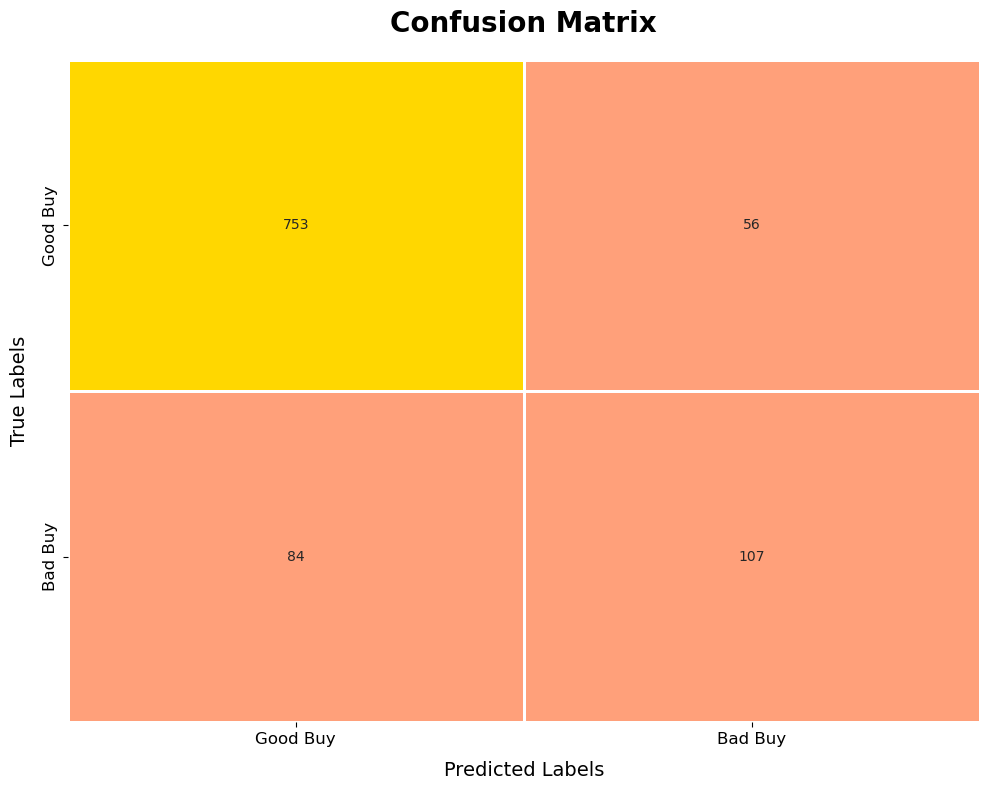

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select model

plt.figure(figsize=(10, 8))  # Zwiększony rozmiar figury dla lepszej czytelności

# Tworzymy własną paletę kolorów
colors = ['#FFA07A', '#20B2AA', '#9370DB', '#FFD700']
custom_cmap = sns.color_palette(colors)

# Używamy własnej palety kolorów w heatmapie
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['Good Buy', 'Bad Buy'], yticklabels=['Good Buy', 'Bad Buy'],
            linewidths=1, linecolor='white')

# Dodajemy tytuł i etykiety osi
plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Labels', fontsize=14, labelpad=10)
plt.ylabel('True Labels', fontsize=14, labelpad=10)

# Dostosowujemy rozmiar czcionki dla etykiet w macierzy
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


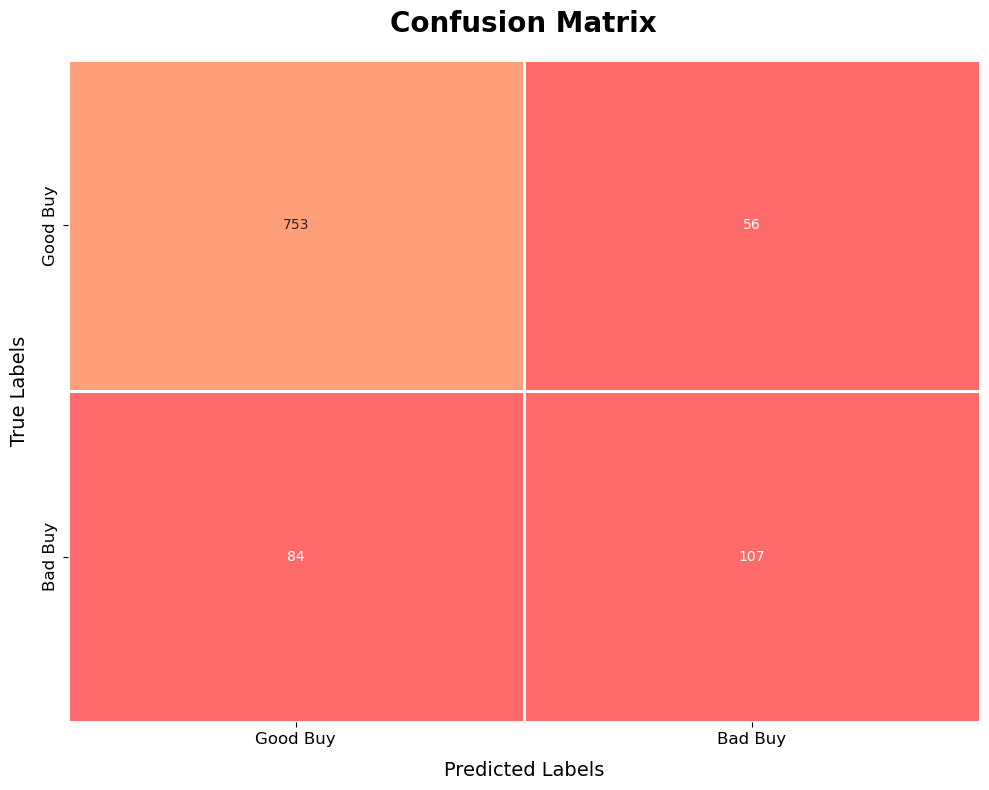

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select model

plt.figure(figsize=(10, 8))  # Zwiększony rozmiar figury dla lepszej czytelności

# Tworzymy własną paletę kolorów z czterema wyraźnie różnymi kolorami
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
custom_cmap = sns.color_palette(colors)

# Używamy własnej palety kolorów w heatmapie
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['Good Buy', 'Bad Buy'], yticklabels=['Good Buy', 'Bad Buy'],
            linewidths=1, linecolor='white')

# Dodajemy tytuł i etykiety osi
plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Labels', fontsize=14, labelpad=10)
plt.ylabel('True Labels', fontsize=14, labelpad=10)

# Dostosowujemy rozmiar czcionki dla etykiet w macierzy
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


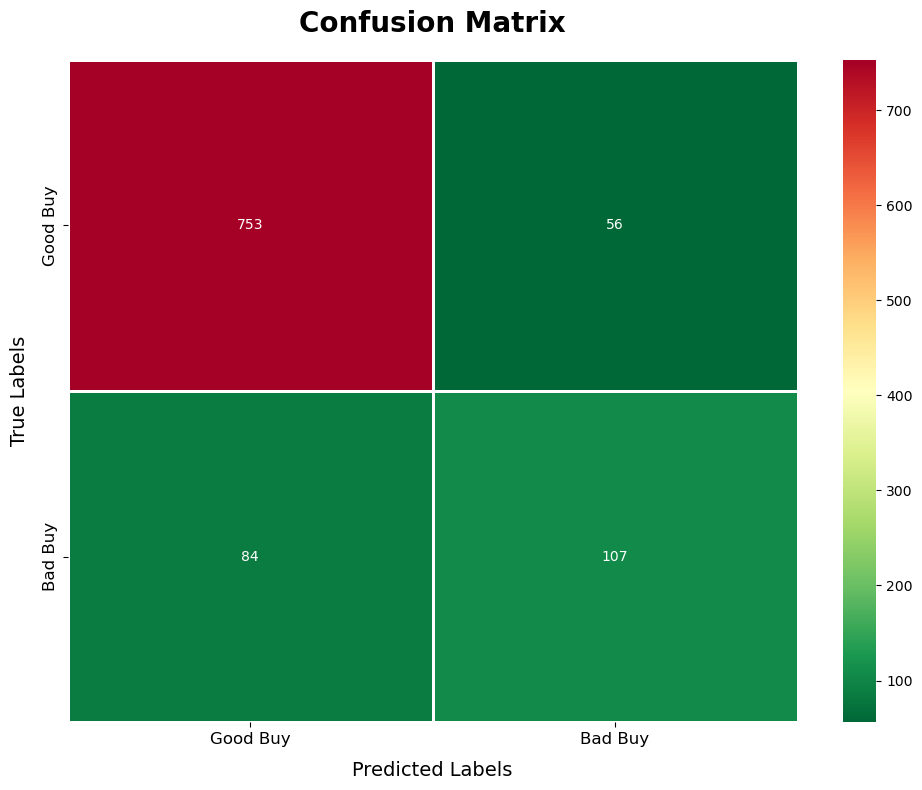

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select model

plt.figure(figsize=(10, 8))  # Zwiększony rozmiar figury dla lepszej czytelności

# Używamy palety kolorów, która zapewnia większe zróżnicowanie
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlGn_r', cbar=True,
            xticklabels=['Good Buy', 'Bad Buy'], yticklabels=['Good Buy', 'Bad Buy'],
            linewidths=1, linecolor='white')

# Dodajemy tytuł i etykiety osi
plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Labels', fontsize=14, labelpad=10)
plt.ylabel('True Labels', fontsize=14, labelpad=10)

# Dostosowujemy rozmiar czcionki dla etykiet w macierzy
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


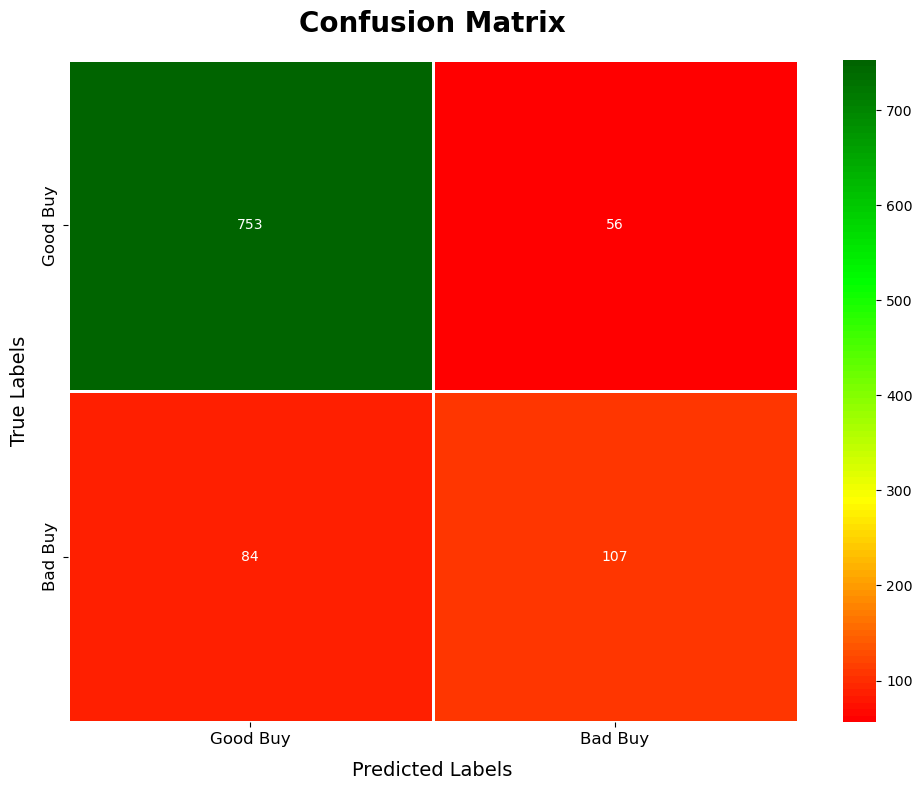

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Select model

plt.figure(figsize=(10, 8))  # Zwiększony rozmiar figury dla lepszej czytelności

# Tworzymy własną paletę kolorów z większym zróżnicowaniem zieleni
colors = ['#FF0000', '#FFFF00', '#00FF00', '#006400']
n_bins = 100
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

# Używamy własnej palety kolorów w heatmapie
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=True,
            xticklabels=['Good Buy', 'Bad Buy'], yticklabels=['Good Buy', 'Bad Buy'],
            linewidths=1, linecolor='white')

# Dodajemy tytuł i etykiety osi
plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Labels', fontsize=14, labelpad=10)
plt.ylabel('True Labels', fontsize=14, labelpad=10)

# Dostosowujemy rozmiar czcionki dla etykiet w macierzy
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()
